In [118]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
np.random.seed(42)

In [119]:
def euclid_dis(x1,x2):
    return np.sqrt(np.sum((x1-x2)**2))

In [120]:
class kmeans():
    def __init__(self,k=5,maxiter=100,plotsteps=False):
        self.k=k
        self.maxiter=maxiter
        self.plotsteps=plotsteps
        self.clusters=[[] for _ in range(self.k)]   # list of list of K clusters
        self.centroids=[]

        print(self.centroids)
    def predict(self,x):
        self.x=x
        self.n_samples,self.n_features=500,2
        # initializde centroids
        random_idx=np.random.choice(self.n_samples,self.k,replace=False)
        self.centroids=[self.x[i] for i in random_idx]

        #optimization
        for _ in range(self.maxiter):
            #update clusters
            self.clusters=self.createclusters(self.centroids) 
        
            
         # update centroids
            oldcentroids=self.centroids
           
            
            if self._is_converged(oldcentroids,self.centroids):
                break
            # check if converged
        print(self.clusters)
   
            
# return cluster labels     dfdfdf 
        return self.getclusterlabels(self.clusters)

    def getclusterlabels(self,clusters):
        labels=np.empty(self.n_samples)
        for clusteridx,cluster in enumerate(clusters):
            for sampleidx in cluster:
                labels[sampleidx]=clusteridx
        return labels


    def createclusters(self,centroids):
        clusters=[[] for _ in range(self.k)]
        for idx, sample in enumerate(self.x):
            centroid_idx=self.getclosestcentroid(sample,centroids)
            clusters[centroid_idx].append(idx)  #save indexes
        return clusters
    def getclosestcentroid(self,sample,centroids):
        dis=[euclid_dis(sample,point) for point in centroids]
        closest_idx= np.argmin(dis)
        return closest_idx

    def get_centroids(self,clusters):
        centroids=np.zeros((self.k,self.n_features))  #features??                
        for clusteridx,cl in enumerate(clusters):
            clmean= np.mean(self.x[cl],axis=0)
            centroids[clusteridx]=clmean        
        return centroids
    def _is_converged(self,oldcentroids,centroids):
        dis= [euclid_dis(oldcentroids[i],centroids[i]) for i in range(self.k)]
        return sum(dis)==0

    def plot(self):
        fig, ax=plt.subplots(figsize=(12,8))
        for i,index in enumerate(self.clusters):
            point=self.x[index].T
            ax.scatter(*point)
        for point in self.centroids:
            ax.scatter(*point,marker="x",color="black",linewidth=2)
        plt.show()




        
       

In [121]:
x,y=make_blobs(centers=4,n_samples=500,n_features=2,shuffle=True,random_state=42)
print(x.shape)

(500, 2)


In [122]:
clusters=len(np.unique(y))

k=kmeans(k=clusters,maxiter=150,plotsteps=False)

[]


[[3, 11, 13, 16, 19, 21, 29, 31, 32, 33, 42, 43, 44, 51, 55, 56, 61, 74, 76, 79, 83, 89, 96, 98, 105, 106, 108, 120, 147, 148, 149, 154, 156, 165, 171, 172, 175, 176, 180, 182, 183, 186, 188, 194, 196, 197, 200, 201, 213, 214, 216, 218, 221, 223, 225, 226, 232, 236, 242, 247, 248, 250, 251, 252, 253, 257, 260, 261, 263, 267, 270, 271, 274, 275, 276, 280, 283, 285, 291, 292, 304, 332, 336, 337, 342, 343, 345, 347, 357, 359, 361, 370, 382, 386, 392, 393, 397, 398, 399, 403, 411, 414, 416, 417, 419, 421, 425, 428, 438, 439, 444, 448, 452, 458, 464, 466, 469, 472, 473, 476, 481, 484, 491, 494, 496], [1, 4, 5, 7, 9, 14, 25, 26, 30, 34, 35, 40, 48, 50, 53, 58, 62, 65, 66, 69, 71, 72, 77, 80, 82, 91, 93, 110, 115, 118, 119, 122, 127, 128, 133, 140, 144, 150, 151, 158, 159, 164, 167, 170, 177, 178, 179, 189, 190, 193, 195, 199, 202, 206, 211, 215, 227, 228, 230, 233, 235, 237, 241, 249, 258, 264, 265, 269, 279, 284, 289, 290, 298, 300, 306, 307, 310, 315, 326, 344, 346, 349, 350, 352, 355, 358

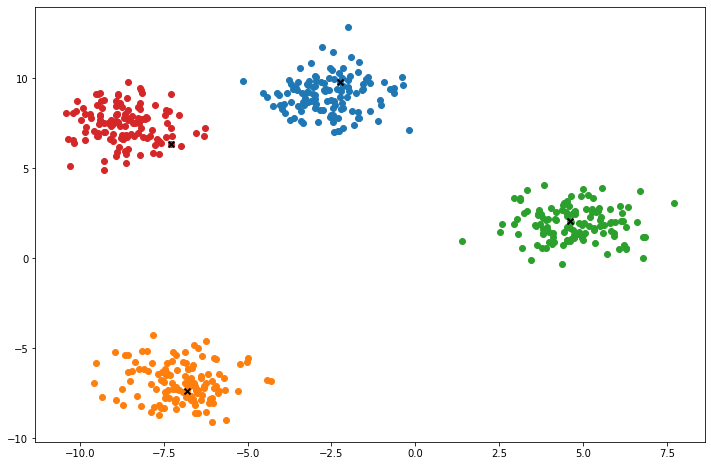

In [128]:
ypred=k.predict(x)

k.plot()